In [379]:
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline
from os.path import join
import os
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import patches

from scipy.optimize import curve_fit

In [96]:
fits_dir = '/xdisk/timeifler/wxs0703/kl_nn/train_data_massive/'
samp_dir = '/xdisk/timeifler/wxs0703/kl_nn/samples/samples_massive.csv'
fig_dir = '/xdisk/timeifler/wxs0703/kl_nn/figures/'

In [97]:
samples = pd.read_csv(samp_dir)

In [466]:
hdu = fits.open(join(fits_dir, 'training_100.fits'))
hdu[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                   61                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INSTNAME= 'DESI    '                                                            
OBSTYPE =                    1                                                  
SKYMODEL= '../data/Skyspectra/spec-sky.dat'                                     
PSFTYPE = 'airy_fwhm'                                                           
PSFFWHM =                  1.0                                                  
DIAMETER=               332.42                                                  
EXPTIME =                  6

In [467]:
hdu.info()

Filename: /xdisk/timeifler/wxs0703/kl_nn/train_data_massive/training_100.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1                1 ImageHDU        24   (61,)   float64   
  2                1 ImageHDU        24   (61,)   float64   
  3                1 ImageHDU        24   (61,)   float64   
  4                1 ImageHDU        24   (61,)   float64   
  5                1 ImageHDU        24   (61,)   float64   
  6                1 ImageHDU        24   (61,)   float64   
  7                1 ImageHDU        21   (48, 48)   float32   
  8                1 ImageHDU        21   (48, 48)   float32   
  9                1 ImageHDU        21   (48, 48)   float32   
 10                1 ImageHDU        21   (48, 48)   float32   
 11                1 ImageHDU        21   (48, 48)   float32   
 12                1 ImageHDU        21   (48, 48)   float32   


In [194]:
pixscale = hdu[7].header['PIXSCALE']

In [388]:
image_data = hdu[7].data

In [90]:
spec_stack = [hdu[2*i+1].data for i in range(3)]

In [91]:
spec_stack = np.vstack(spec_stack)

(-0.5, 47.5, 47.5, -0.5)

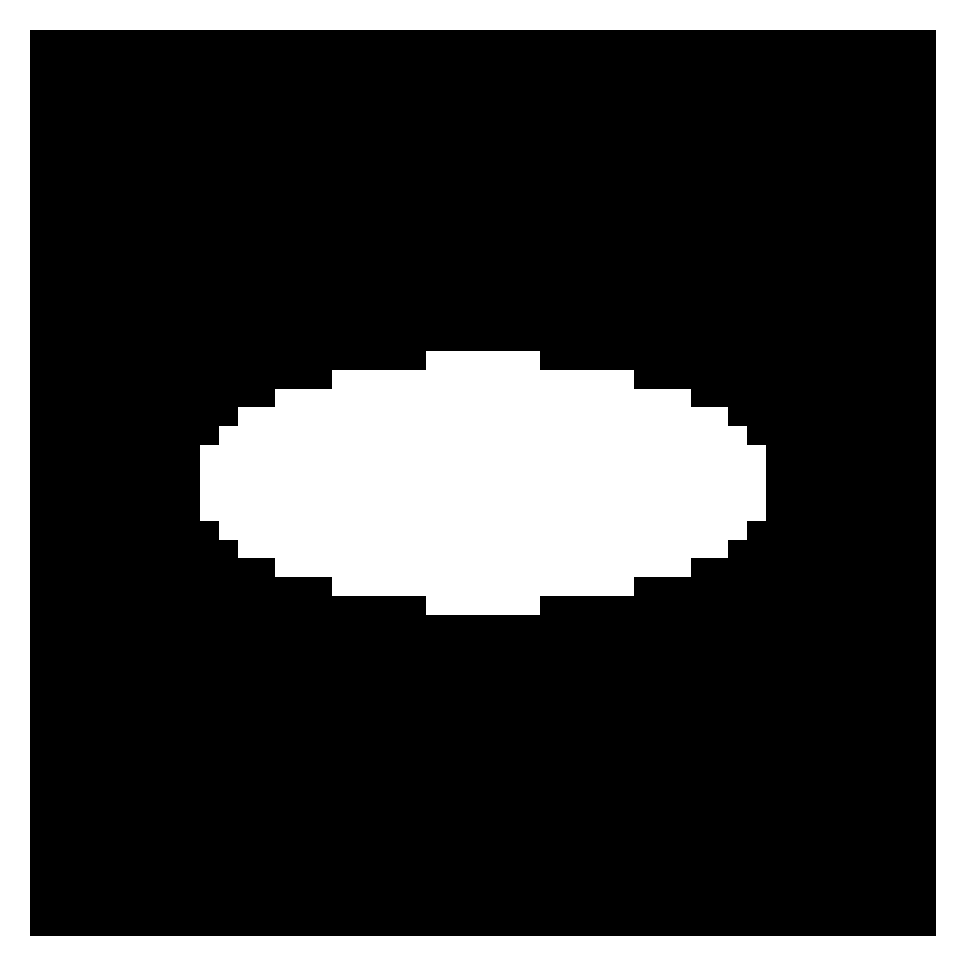

In [391]:
plt.imshow(image_data > 0.05*np.max(image_data), cmap='gray')
plt.axis('off')
#plt.savefig(join(fig_dir, 'training_data_img_samples.jpg'), dpi=300)

In [243]:
Sini = np.logspace(-2, 0, 20)

In [246]:
e_int = ((1-q_z**2)*Sini**2)/(2-(1-q_z**2)*Sini**2)
theta_shear = gx/e_int

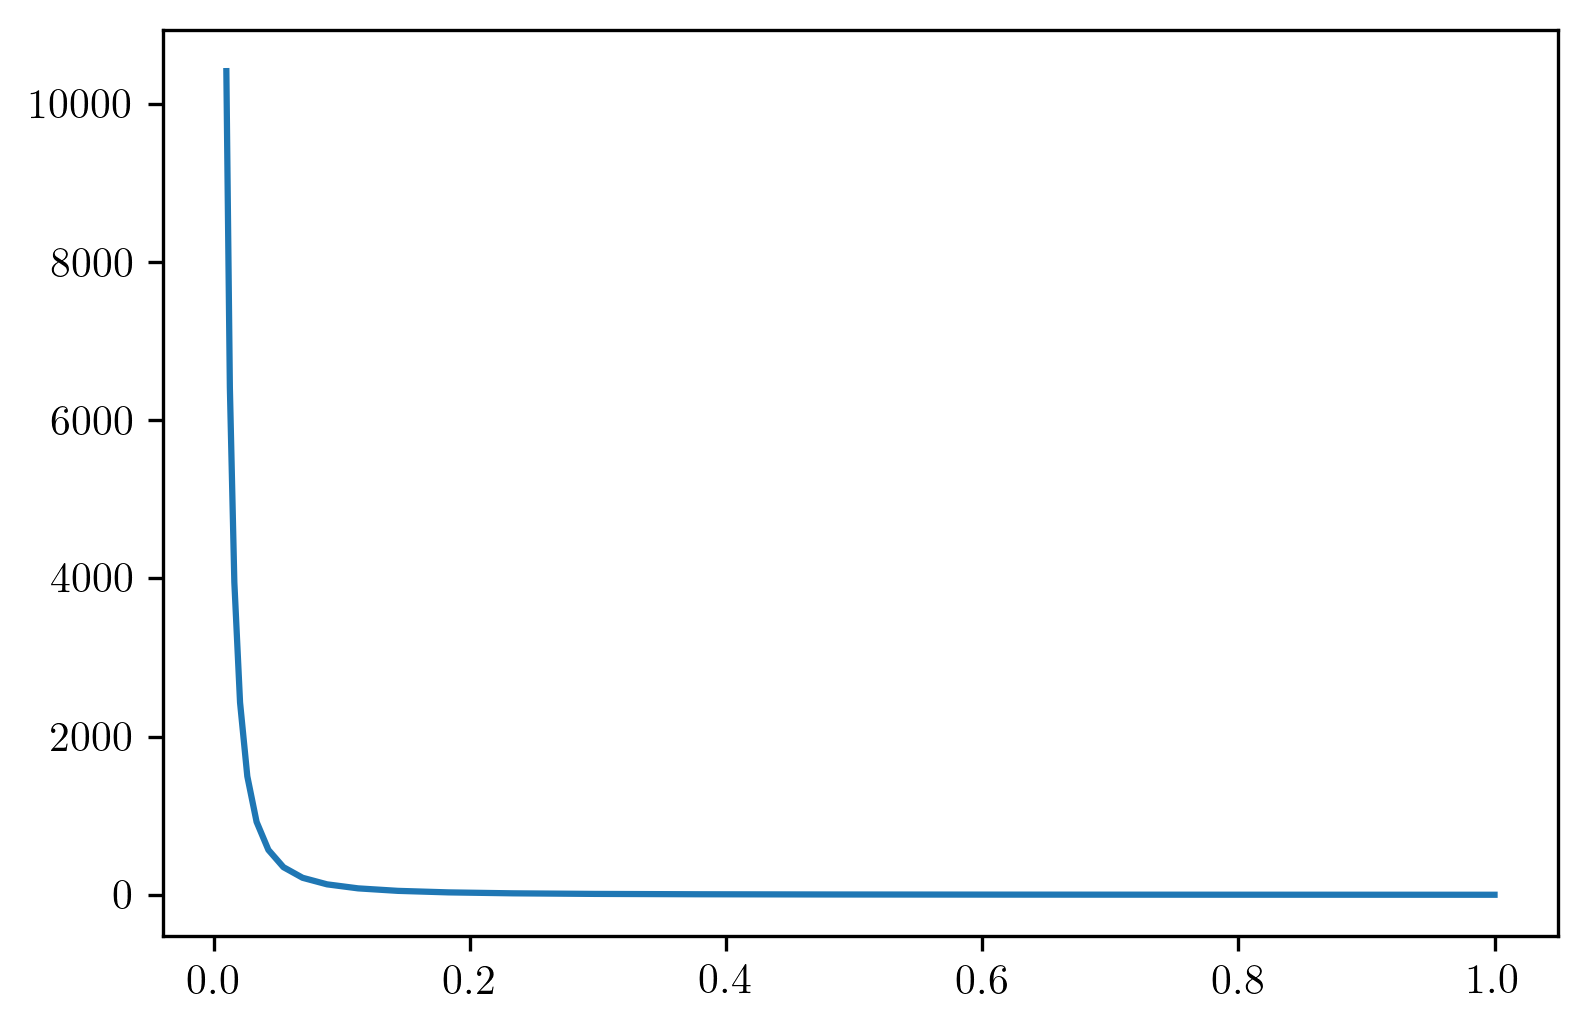

In [247]:
plt.plot(Sini, theta_shear)

In [459]:
fiber_offset = 1.5
q_z = 0.2
theta_int = 0.785
g1 = 0.5; g2 = 0
g = np.array([g1, g2])
sini = 0.01

In [460]:
R = np.array([[np.cos(2*theta_int), np.sin(2*theta_int)],
              [-np.sin(2*theta_int), np.cos(2*theta_int)]])
g = np.matmul(R, g)
e_int = ((1-q_z**2)*sini**2)/(2-(1-q_z**2)*sini**2)
gt = float(g[0])
gx = float(g[1])
print(gt, gx)

0.00039816335536663167 -0.4999998414659173


In [461]:
tan_theta = np.tan(theta_int)
theta_shear = np.arctan2(g2+(1.-g1)*tan_theta, (1.+g1)+g2*tan_theta)
theta_obs = theta_shear
print(theta_obs)

0.32151173242222963


In [436]:
theta_shear = gx/e_int if sini > 0 else np.pi/4
theta_obs = theta_int + theta_shear
print(theta_obs)

0.6996692243822663


In [462]:
offset_int = np.array([[fiber_offset,   fiber_offset],
                       [fiber_offset,   fiber_offset],
                       [0,0]])
angle = np.array([[np.cos(theta_obs), np.sin(theta_obs)],
                  [np.cos(np.pi+theta_obs), np.sin(np.pi+theta_obs)],
                  [0, 0]])
offset = offset_int * angle
offset

array([[ 1.42313819,  0.47400179],
       [-1.42313819, -0.47400179],
       [ 0.        ,  0.        ]])

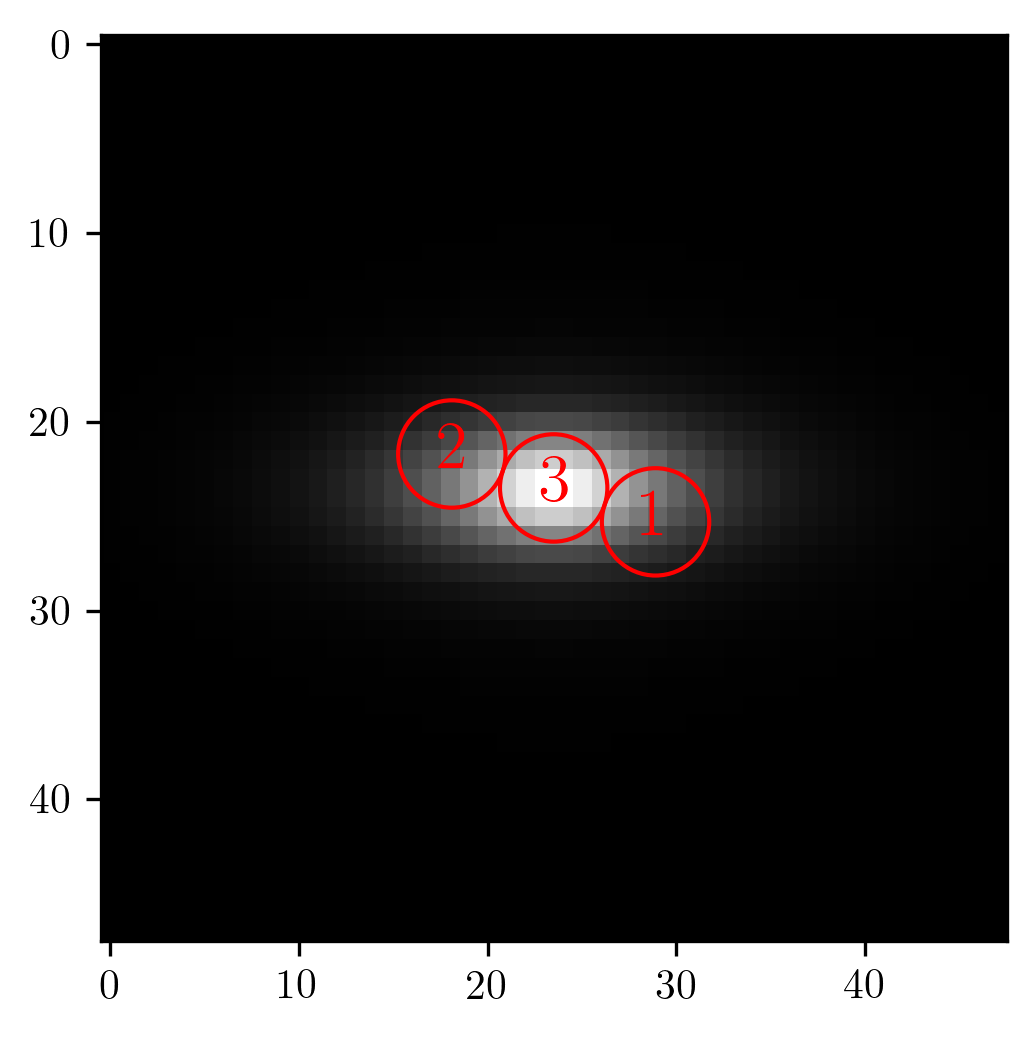

In [463]:
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "figure.dpi": 300})
ax = plt.figure().add_subplot()
hdu = fits.open(join(fits_dir, f'training_{0}.fits'))
params = np.round(np.array(samples.iloc[i]), 2)
image_data = hdu[11].data
ax.imshow(image_data, cmap='gray')

for j in range(3):
    x, y = tuple(offset[j])
    x = x/pixscale + 23.5
    y = y/pixscale + 23.5
    offsetpos = (x,y)
    fiber = patches.Circle(offsetpos, 0.75/pixscale, color='red', fill=False)
    ax.add_patch(fiber)
    ax.text(x-0.75, y+0.75, f'{j+1}', fontsize=16, color='red')

plt.show()

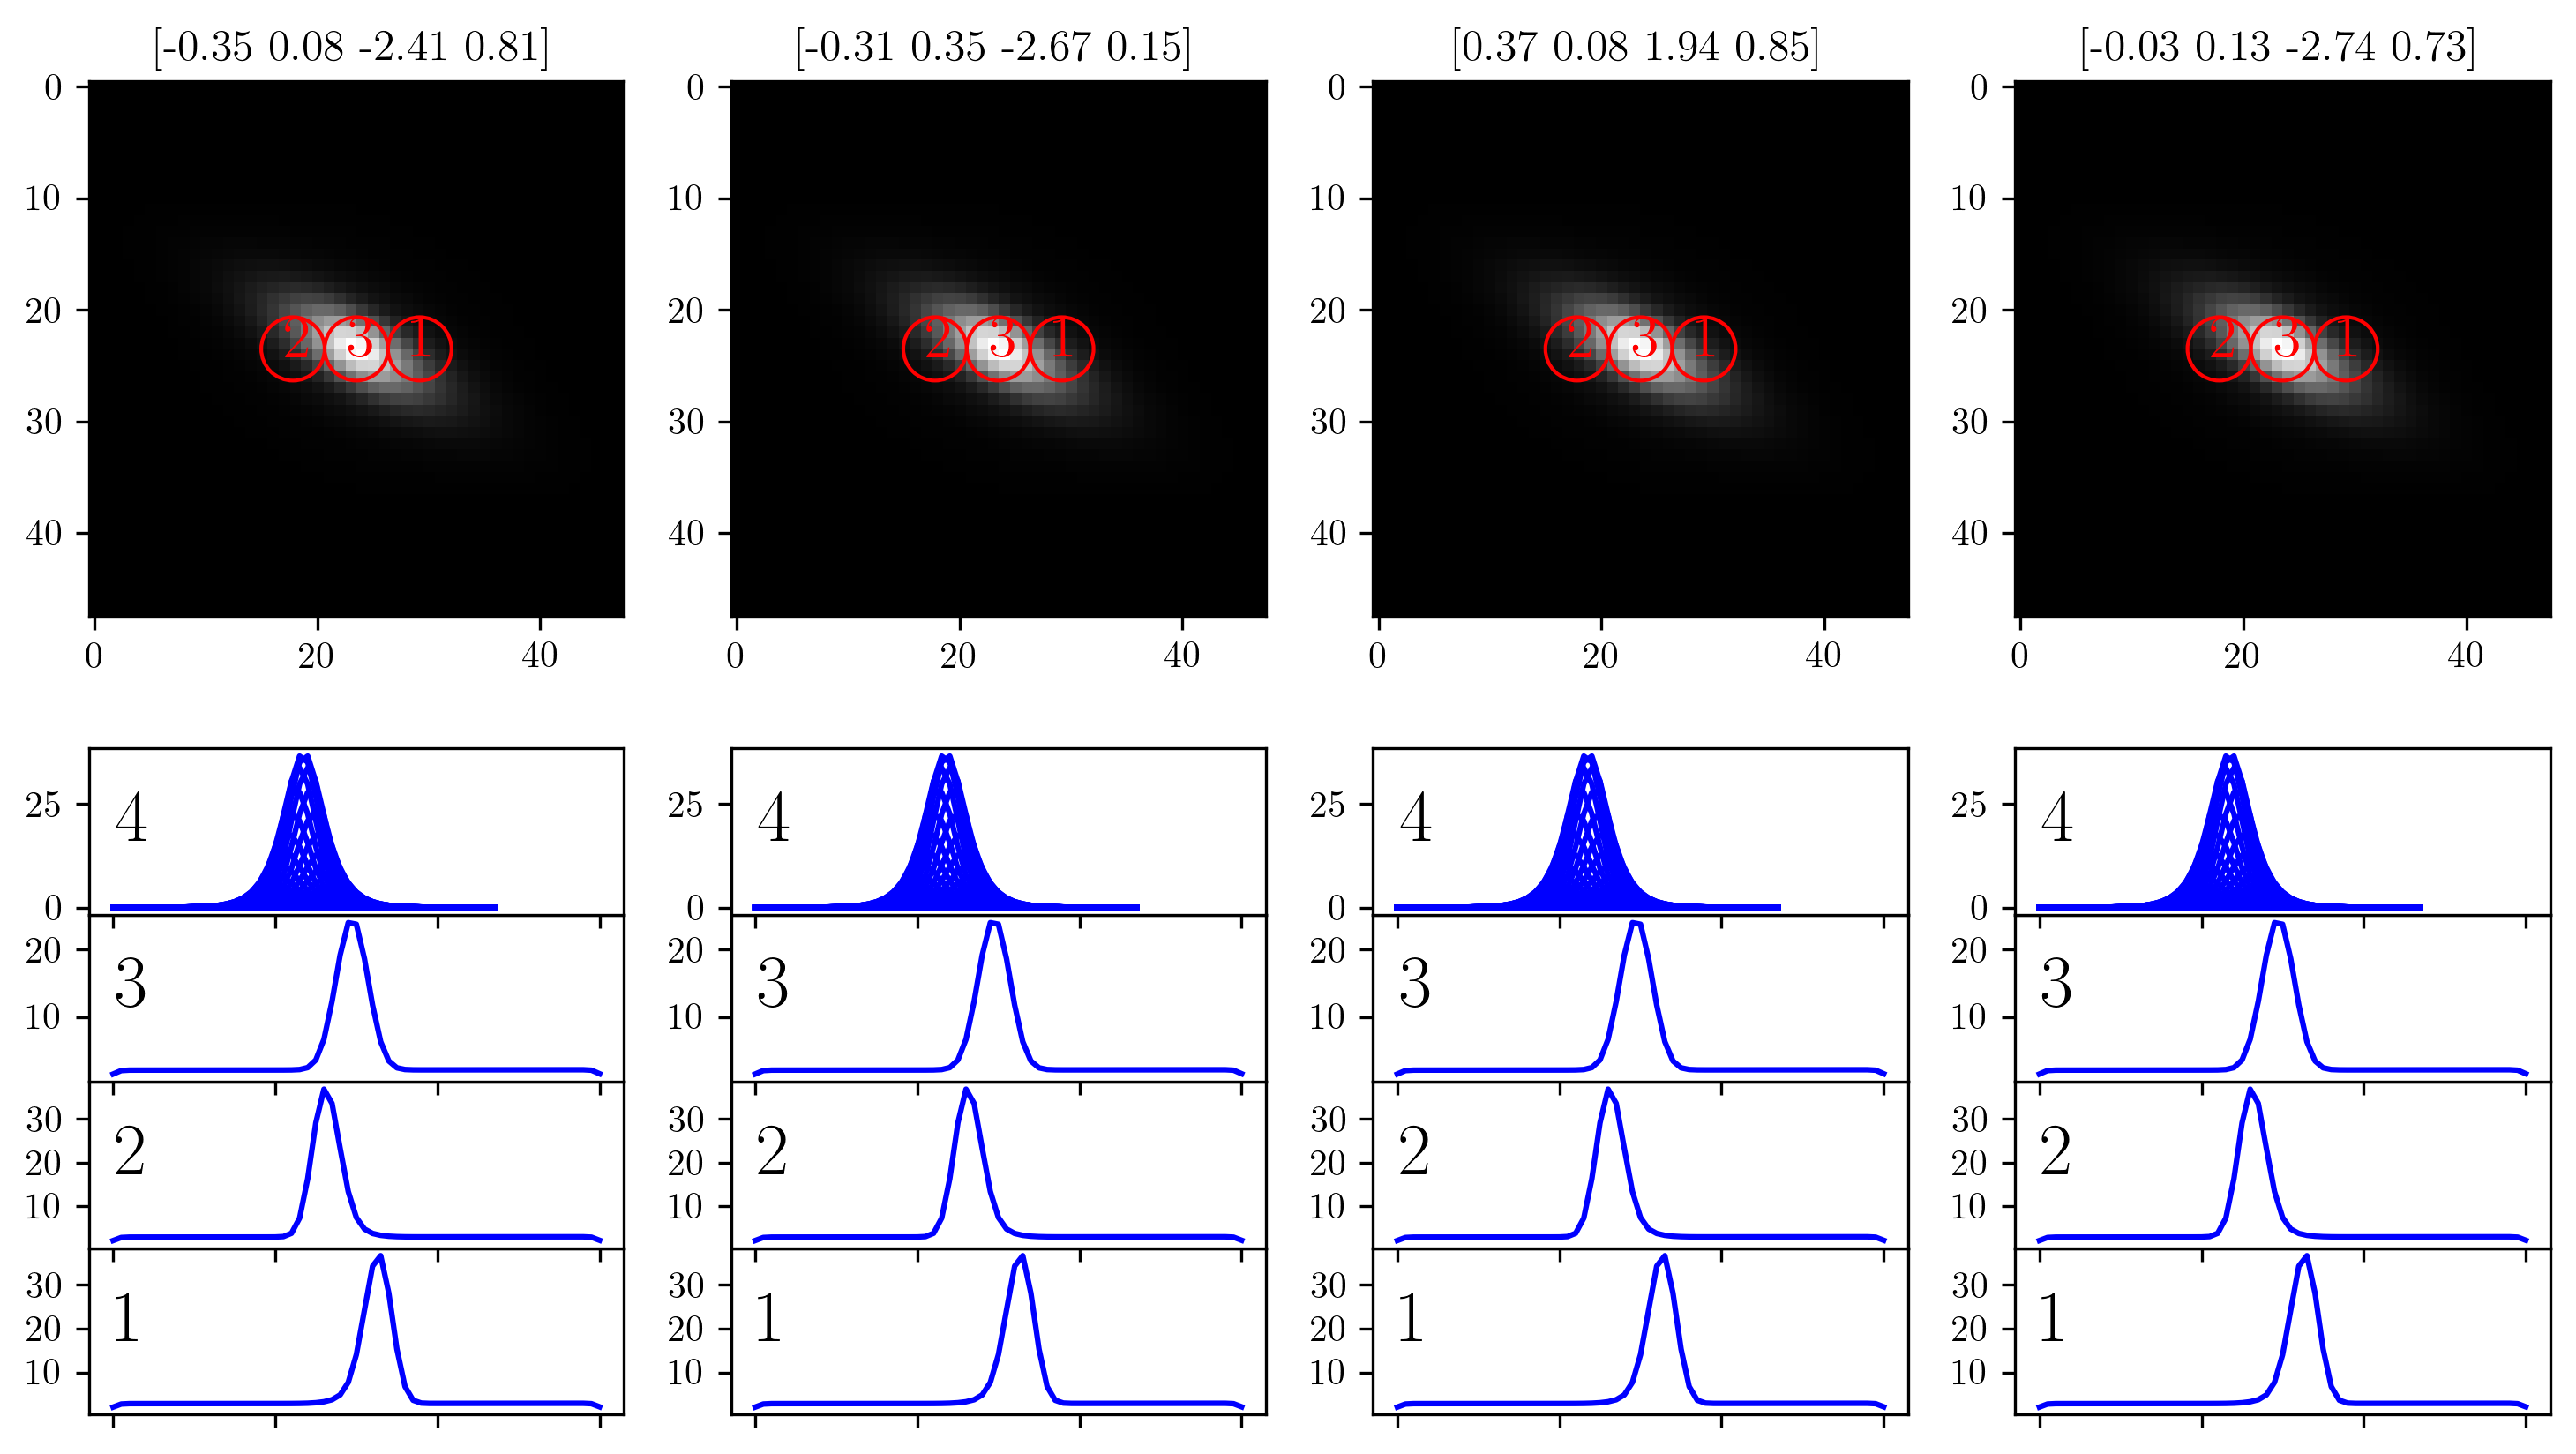

In [94]:
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "figure.dpi": 300})
fig = plt.figure(figsize=(12, 7))
gs = fig.add_gridspec(2, 4, wspace=0.2, hspace=0.1)


for i, grid in enumerate(gs):
    if i < 4:
        ax = plt.subplot(grid)
        hdu = fits.open(join(fits_dir, f'training_{1}.fits'))
        params = np.round(np.array(samples.iloc[i]), 2)
        image_data = hdu[11].data
        ax.imshow(image_data, cmap='gray')
        
        for j in range(3):
            x, y = tuple(offset[j])
            x = x/pixscale + 23.5
            y = y/pixscale + 23.5
            offsetpos = (x,y)
            fiber = patches.Circle(offsetpos, 0.75/pixscale, color='red', fill=False)
            ax.add_patch(fiber)
            ax.text(x-0.75, y+0.75, f'{j+1}', fontsize=16, color='red')
        ax.set_title(f'{params[1:5]}')
        
    else:
        i -= 4
        hdu = fits.open(join(fits_dir, f'training_{1}.fits'))
        spec_data = hdu[1].data
        ax = plt.subplot(grid)
        plt.sca(ax)
        ax.plot(spec_data, color='blue')
        ax.text(0.05, 0.75, '1', horizontalalignment='left', verticalalignment='top', transform = ax.transAxes, fontsize=20)
        divider = make_axes_locatable(ax)

        for j in range(3):
            index = 2*(j+1)+1
            spec_data = hdu[index].data
            ax1 = divider.append_axes("top", size="100%", pad=0, sharex=ax)
            ax1.plot(spec_data, color='blue')
            ax1.text(0.05, 0.75, f'{j+2}', horizontalalignment='left', verticalalignment='top', transform = ax1.transAxes, fontsize=20)
            ax1.set_xticklabels([])

plt.savefig(join(fig_dir, 'training_data_img_samples.jpg'), dpi=300)
plt.show()

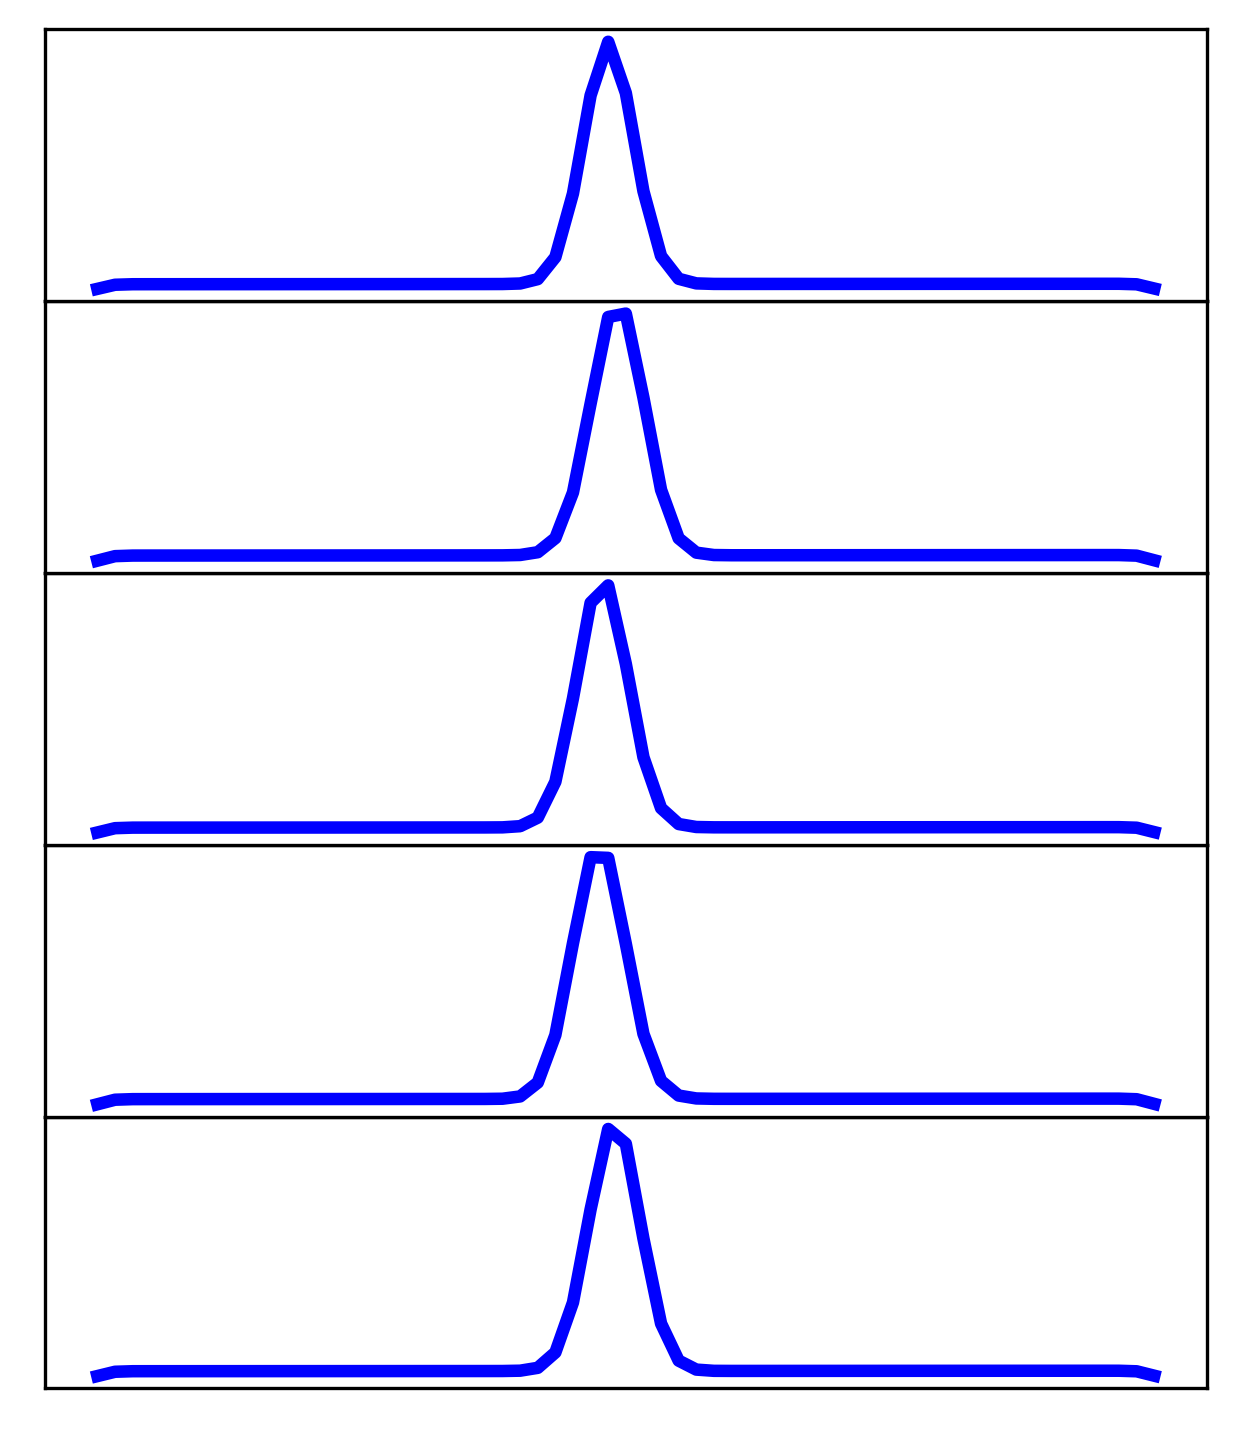

In [17]:
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "figure.dpi": 300})
fig, ax = plt.subplots(figsize=(5, 6))

hdu = fits.open(join(fits_dir, 'training_0.fits'))
spec_data = hdu[1].data
plt.sca(ax)
ax.plot(spec_data, color='blue', lw=3)
divider = make_axes_locatable(ax)
# set visibility of x-axis as False
xax = ax.axes.get_xaxis()
xax = xax.set_visible(False)
 
# set visibility of y-axis as False
yax = ax.axes.get_yaxis()
yax = yax.set_visible(False)

for j in range(4):
    index = 2*(j+1)+1
    spec_data = hdu[index].data
    ax1 = divider.append_axes("top", size="100%", pad=0, sharex=ax)
    ax1.plot(spec_data, color='blue', lw=3)
    ax1.set_xticklabels([])
    # set visibility of x-axis as False
    xax = ax1.axes.get_xaxis()
    xax = xax.set_visible(False)

    # set visibility of y-axis as False
    yax = ax1.axes.get_yaxis()
    yax = yax.set_visible(False)

plt.savefig(join(fig_dir, 'spectra_example.jpg'), dpi=300)